<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/Claude3_data_extraction_from_screenshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CorneAI Project: Extracting Relevant Text from Smartphone Screenshots Using Claude3 Vision**


##**Setup environment**

In [53]:
from PIL import Image
import matplotlib.pyplot as plt

# APIの設定
from google.colab import drive
drive.mount("/content/drive")

with open("/content/drive/MyDrive/Deep_learning/api.txt") as file:
    #text = file.read()
    i=1
    key = []
    while True:
        include_break_line = file.readline() #改行が含まれた行
        line = include_break_line.rstrip() #改行を取り除く
        if line: #keyの読み込み
            #print(f'{i}行目：{line}')
            key.append(line)
            i += 1
        else:
            break

# APIキーの準備
# #ngrok_aceess_token = key[5]
#openai_api_key = key[3]
# deepl_auth_key = key[1]
# serp_api_key = key[7]

import os
os.environ["OPENAI_API_KEY"] = key[3]
os.environ["SERPAPI_API_KEY"] = key[7]
os.environ["GOOGLE_CSE_ID"] = key[9]
os.environ["GOOGLE_API_KEY"] = key[11]
os.environ["ANTHROPIC_API_KEY"] = key[21]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install anthropic

##**Single image analysis**

In [ ]:
import anthropic
import base64
from google.colab import files
import httpx

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)



# image1_url = "https://upload.wikimedia.org/wikipedia/commons/a/a7/Camponotus_flavomarginatus_ant.jpg"
# image1_media_type = "image/jpeg"
# image1_data = base64.b64encode(httpx.get(image1_url).content).decode("utf-8")



# ファイルアップロードのダイアログを表示
uploaded_file = files.upload()

# アップロードされたファイルのファイル名を取得
file_name = list(uploaded_file.keys())[0]
print(file_name)

# 画像ファイルを読み込み、base64エンコードを行う
with open(file_name, "rb") as f:
    image_data = f.read()
    image1_data = base64.b64encode(image_data).decode("utf-8")

# 画像のMIMEタイプを設定（必要に応じて変更）
image1_media_type = "image/jpeg"  # または "image/png" など



In [ ]:
prompt = """
<instruction>
    Given an image, provide the following information in a list format:
    ["figure_num", "top1_diag", "top1_prob", "top2_diag", "top2_prob", "top3_diag", "top3_prob"]
    The image shows a close-up view of an eye. Based on the information provided in the image, please carefully extract the following details:

    figure_num: file name ({int}.jpg) written in the top left corner of the image.
    top1_diag: The top diagnosis with the highest probability
    top1_prob: The probability of the top diagnosis (expressed as a decimal between 0 and 1)
    top2_diag: The second top diagnosis
    top2_prob: The probability of the second top diagnosis (expressed as a decimal between 0 and 1)
    top3_diag: The third top diagnosis
    top3_prob: The probability of the third top diagnosis (expressed as a decimal between 0 and 1)
</instruction>

<example>
    <input>
    234.jpg
    deposit = 94.1%
    scar = 1.2%
    non-infection = 0.3%

    <output>
    ["234.jpg", "deposit", 0.941, "scar", 0.012, "non-infection", 0.003]
</example>

Please provide the information in a list format as requested. If any of the values are not available, include "N/A" in the corresponding list element.
Output should be a list form without additional explanation.
"""

In [ ]:
client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)

message = client.messages.create(
    #model="claude-3-opus-20240229",
    model = "claude-3-haiku-20240307",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": image1_media_type,
                        "data": image1_data,
                    },
                },
                {
                    "type": "text",
                    "text": prompt,
                }
            ],
        }
    ],
)

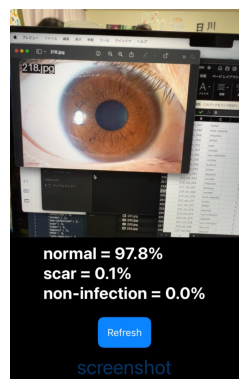

["218.jpg", "normal", 0.978, "scar", 0.001, "non-infection", 0.0]


In [ ]:
# 画像を開く
image = Image.open(file_name)

# 画像を表示
plt.imshow(image)
plt.axis('off')  # 軸を非表示にする
plt.show()

# textを抽出して表示
text = message.content[0].text
print(text)

##**Multiple image analysis**

In [56]:
parent_dir = "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の240問/eval234"

%cd $parent_dir

/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の240問/eval234


In [ ]:
import pandas as pd

csv_num = 1 #specify csv number

csv_path = f"csv/{csv_num}.csv"
images_zip_path = f"screenshot/{csv_num}.zip"

# CSVファイルを読み込む
df = pd.read_csv(csv_path)
# データフレームの内容を表示
print(df)
print(images_zip_path)

In [58]:
import zipfile
import shutil
import os

if os.path.exists("/content/temp"):
    shutil.rmtree("/content/temp")
os.makedirs("/content/temp")

# ZIPファイルのパスを指定
images_zip_path = f"screenshot/{csv_num}.zip"

# ZIPファイルを読み込む
with zipfile.ZipFile(images_zip_path, 'r') as zip_ref:
    # ZIPファイルを解凍
    zip_ref.extractall("/content/temp")
    if os.path.exists("/content/temp/__MACOSX"):
        shutil.rmtree("/content/temp/__MACOSX")

In [59]:
import anthropic
import base64
from google.colab import files
import httpx
import json
import time

client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ["ANTHROPIC_API_KEY"],
)

prompt = """
<instruction>
    Given an image, provide the following information in a list format:
    ["figure_num", "top1_diag", "top1_prob", "top2_diag", "top2_prob", "top3_diag", "top3_prob"]
    The image shows a close-up view of an eye. Based on the information provided in the image, please carefully extract the following details:

    figure_num: file name ({int}.jpg) written in the top left corner of the image.
    top1_diag: The top diagnosis with the highest probability
    top1_prob: The probability of the top diagnosis (expressed as a decimal between 0 and 1)
    top2_diag: The second top diagnosis
    top2_prob: The probability of the second top diagnosis (expressed as a decimal between 0 and 1)
    top3_diag: The third top diagnosis
    top3_prob: The probability of the third top diagnosis (expressed as a decimal between 0 and 1)
</instruction>

<example>
    <input>
    234.jpg
    deposit = 94.1%
    scar = 1.2%
    non-infection = 0.3%

    <output>
    ["234.jpg", "deposit", 0.941, "scar", 0.012, "non-infection", 0.003]
</example>

Please provide the information in a list format as requested. If any of the values are not available, include "N/A" in the corresponding list element.
Output should be a list form without additional explanation.
"""

def claude_extraction(jpg_path):
    # 画像ファイルを読み込み、base64エンコードを行う
    with open(jpg_path, "rb") as f:
        image_data = f.read()
        image1_data = base64.b64encode(image_data).decode("utf-8")

    # 画像のMIMEタイプを設定（必要に応じて変更）
    image1_media_type = "image/jpeg"  # または "image/png" など

    client = anthropic.Anthropic(
        # defaults to os.environ.get("ANTHROPIC_API_KEY")
        api_key=os.environ["ANTHROPIC_API_KEY"],
    )

    message = client.messages.create(
        #model="claude-3-opus-20240229",
        model = "claude-3-haiku-20240307",
        max_tokens=1024,
        messages=[
              {
                  "role": "user",
                  "content": [
                      {
                          "type": "image",
                          "source": {
                              "type": "base64",
                              "media_type": image1_media_type,
                              "data": image1_data,
                          },
                      },
                      {
                          "type": "text",
                          "text": prompt,
                      }
                  ],
              }
          ],
      )

    # 画像を開く
    image = Image.open(jpg_path)

    # 画像を表示
    plt.imshow(image)
    plt.axis('off')  # 軸を非表示にする
    plt.show()

    # textを抽出して表示
    text = message.content[0].text

    return text

def extract_number(filename):
    try:
        return int(filename.split("_")[-1].split(".")[0])
    except ValueError:
        return float('inf')  # 数字でない場合は無限大を返す




In [60]:
# 処理済みのファイルを記憶するリスト
processed_files = []

In [ ]:
classification_mapping = {
    'infection': 0,
    'normal': 1,
    'non-infection': 2,
    'scar': 3,
    'tumor': 4,
    'deposit': 5,
    'APAC': 6,
    'lens-opacity': 7,
    'bullous': 8
}

# JPGファイルが格納されているディレクトリのパスを指定
screenshot_dir = f"/content/temp/{csv_num}/"
print(screenshot_dir)

# JPGファイルの拡張子
jpg_extensions = [".jpg"]

# ディレクトリ内のファイルを数字の小さい順にソート
sorted_filenames = sorted(os.listdir(screenshot_dir), key=extract_number)

# ディレクトリ内のファイルに対してループ処理
for filename in sorted_filenames:
    # ファイルの拡張子を取得
    _, extension = os.path.splitext(filename)

    # 処理済みのファイルをスキップ
    if filename in processed_files:
        continue

    # JPGファイルの場合のみ処理を行う
    if extension.lower() in jpg_extensions:
        # JPGファイルのフルパスを作成
        jpg_path = os.path.join(screenshot_dir, filename)

        # ここで、JPGファイルに対する処理を行う
        print(f"Processing {jpg_path}")

        try:
            output = claude_extraction(jpg_path)
            lst = json.loads(output)
            print(lst)

            # outputリストから拡張子を取り除いてシリアル番号を取得
            serial_number = int(lst[0].split(".")[0])
            print(f"serial_number: {serial_number}")

            # シリアル番号と一致する行のインデックスを取得
            matching_index = df[df['serial_number'] == serial_number].index
            if len(matching_index) > 0:
                # 一致する行が見つかった場合、指定された列に値を代入
                df.loc[matching_index, ['top1', 'top1_prob', 'top2', 'top2_prob', 'top3', 'top3_prob']] = [
                    int(classification_mapping[lst[1]]),
                    float(lst[2]),
                    int(classification_mapping[lst[3]]),
                    float(lst[4]),
                    int(classification_mapping[lst[5]]),
                    float(lst[6])
                ]
                print("値が代入されました。")

                # 代入後の行の内容を出力
                print(df.loc[matching_index, ['top1', 'top1_prob', 'top2', 'top2_prob', 'top3', 'top3_prob']])

                # CSVを上書き保存
                df.to_csv(csv_path, index=False)

                # 処理済みのファイルをリストに追加
                processed_files.append(filename)
                time.sleep(5)
            else:
                print("一致する行が見つかりませんでした。")
        except:
            print("無効な値です。次のファイルに進みます。")

In [49]:
csv_num = csv_num #specify csv number

csv_path = f"csv/{csv_num}.csv"

# CSVファイルを読み込む
df = pd.read_csv(csv_path)
# データフレームの内容を表示
#print(df)

# Calculate accuracy for the new dataset
accuracy = (df['class_num'] == df['top1']).mean()
print(f"accuracy: {accuracy}")

# Calculate accuracy for top1_prob >= 0.9 and <0.9
accuracy_high_prob = (df[df['top1_prob'] >= 0.9]['class_num'] == df[df['top1_prob'] >= 0.9]['top1']).mean()
accuracy_low_prob = (df[df['top1_prob'] < 0.9]['class_num'] == df[df['top1_prob'] < 0.9]['top1']).mean()

print(accuracy_high_prob, accuracy_low_prob)


accuracy: 0.6794871794871795
0.8440366972477065 0.536


In [51]:
corneai_csv_path = f"csv/sumaho_corneai.csv"

# CSVファイルを読み込む
df_corneai = pd.read_csv(corneai_csv_path)
# データフレームの内容を表示
#print(df_corneai)

# Calculate accuracy for the new dataset
accuracy = (df_corneai['class_num'] == df_corneai['top1']).mean()
print(f"accuracy: {accuracy}")

# Calculate accuracy for top1_prob >= 0.9 and <0.9
accuracy_high_prob = (df_corneai[df_corneai['top1_prob'] >= 0.9]['class_num'] == df_corneai[df_corneai['top1_prob'] >= 0.9]['top1']).mean()
accuracy_low_prob = (df_corneai[df_corneai['top1_prob'] < 0.9]['class_num'] == df_corneai[df_corneai['top1_prob'] < 0.9]['top1']).mean()

print(accuracy_high_prob, accuracy_low_prob)

accuracy: 0.7692307692307693
0.9158878504672897 0.6456692913385826


In [52]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.proportion import proportion_confint


# Align the datasets based on 'basename' column
df_merged = pd.merge(df[['basename', 'top1']], df_corneai[['basename', 'top1']], on='basename', suffixes=('_1', '_2'))

# Check if the datasets are correctly aligned and view the first few rows
print(df_merged)

# Calculate the matching probability
matching_probability = (df_merged['top1_1'] == df_merged['top1_2']).mean()

# Calculate Cohen's kappa
kappa = cohen_kappa_score(df_merged['top1_1'], df_merged['top1_2'])


count_matching = (df_merged['top1_1'] == df_merged['top1_2']).sum()
# Total observations
n_observations = len(df_merged)

# Calculate 95% confidence interval using the Wilson score method
confidence_interval = proportion_confint(count_matching, n_observations, method='wilson')


matching_probability, kappa, confidence_interval


                basename  top1_1  top1_2
0              9TTR_R_01     0.0       0
1             12TTR_R_01     0.0       0
2             13TTR_R_01     2.0       2
3             21TTR_L_01     0.0       0
4             25TTR_R_01     6.0       6
..                   ...     ...     ...
179  Tsukazaki_009_r_003     7.0       7
180      Tsukazaki_020_l     5.0       5
181  Tsukazaki_023_l_001     5.0       5
182  Tsukazaki_024_l_001     4.0       4
183  Tsukazaki_026_r_001     4.0       4

[184 rows x 3 columns]


(0.8315217391304348, 0.805854322668482)